In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [161]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data pre-processing

In [163]:
#결측치확인 ,대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

titanic_df.isnull().sum()

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

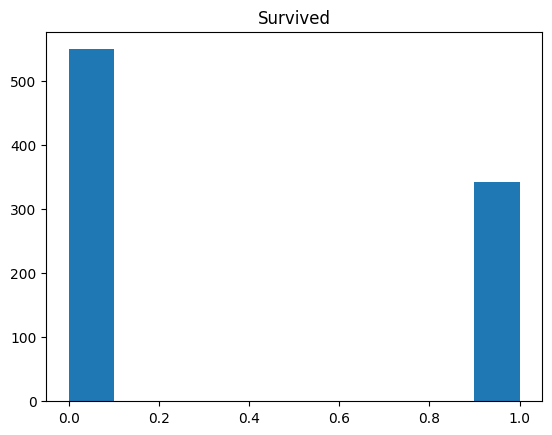

Survived
0    549
1    342
Name: Survived, dtype: int64


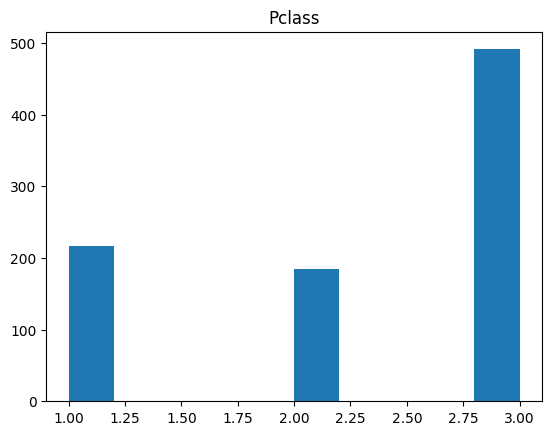

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


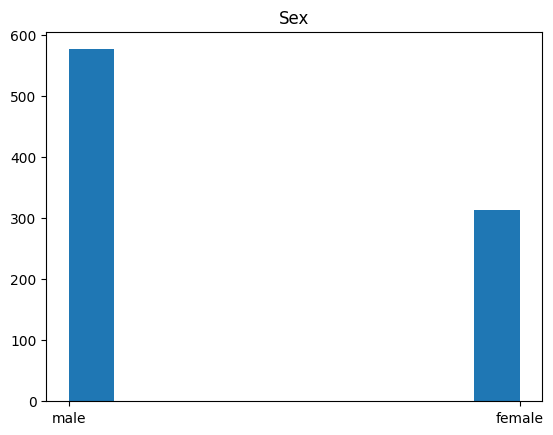

Sex
male      577
female    314
Name: Sex, dtype: int64


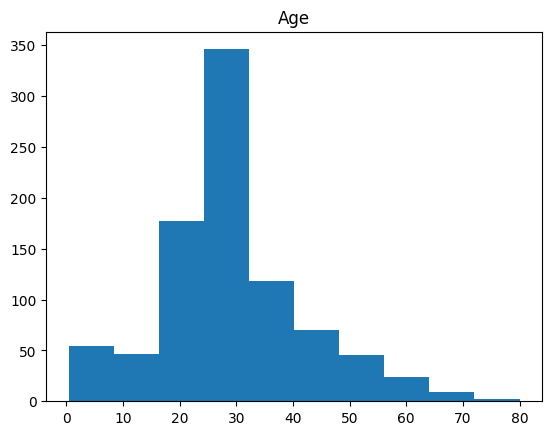

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


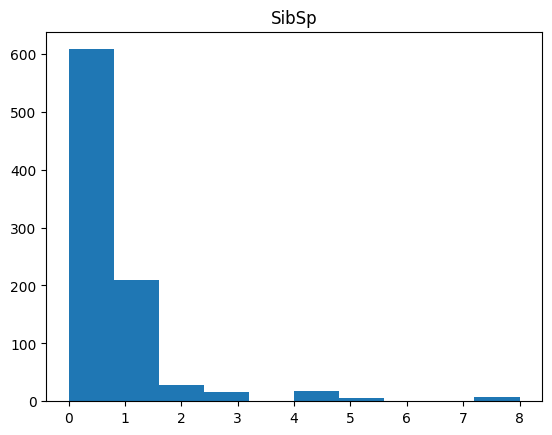

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


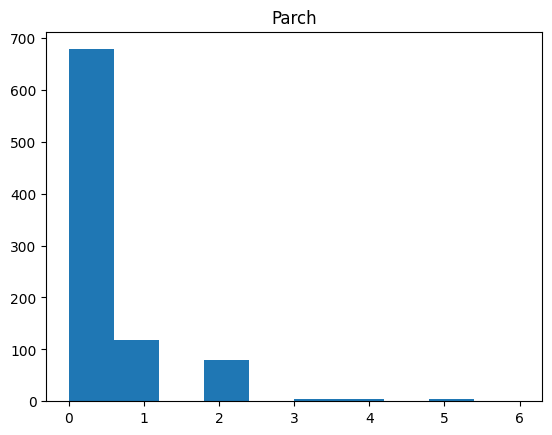

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


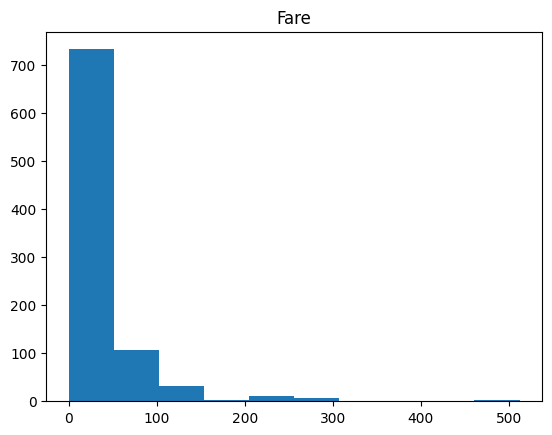

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


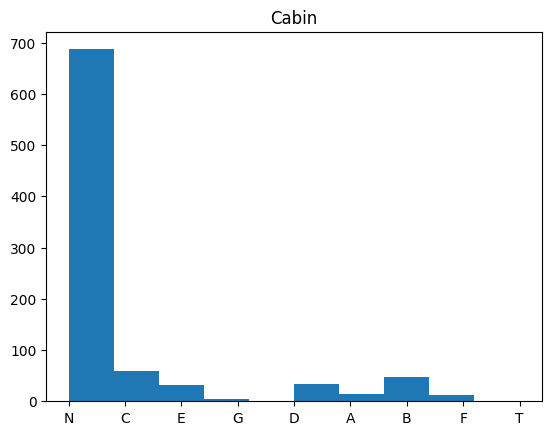

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


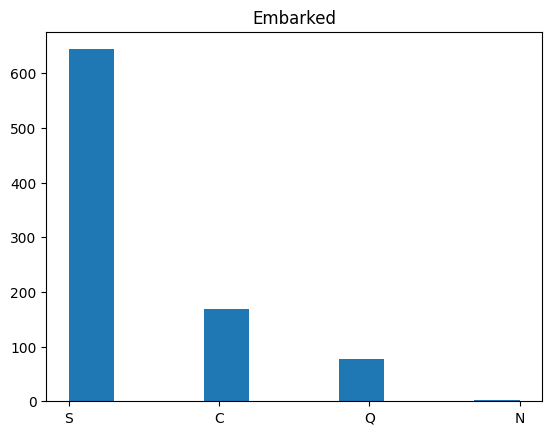

Embarked
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [164]:
#히스토그램 확인
for feature in list(titanic_df.columns):
    if feature in ['Name','Ticket','PassengerId']:
        continue
    plt.hist(titanic_df[feature])
    plt.title(feature)
    plt.show()
    print(feature)
    print(titanic_df[feature].value_counts())

In [165]:
#남여 사망 비교
for sex in ['male','female']:
    for survived in [1,0]:
        print('생존한' if survived else '죽은',end=' ')
        print('남성의' if sex == 'male' else '여성의',end=' ')
        print('수:',((titanic_df['Survived']==survived) & (titanic_df['Sex']==sex)).sum())

생존한 남성의 수: 109
죽은 남성의 수: 468
생존한 여성의 수: 233
죽은 여성의 수: 81


In [166]:
# 성별 라벨 인코딩
titanic_df['Sex'][titanic_df['Sex']=='male'] = 0
titanic_df['Sex'][titanic_df['Sex']=='female'] = 1

In [167]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,C


In [168]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
#원핫인코딩
cabin_one_hot = pd.get_dummies(titanic_df['Cabin'])
embarked_one_hot = pd.get_dummies(titanic_df['Embarked'])
titanic_df.drop(['Cabin','Embarked'],axis=1,inplace=True)
titanic_df = pd.concat([titanic_df,cabin_one_hot,embarked_one_hot],axis=1)
#비정형 제거
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
#
titanic_df['Sex']=titanic_df['Sex'].astype('uint8')

In [170]:
titanic_df['Age'] = (titanic_df['Age']-titanic_df['Age'].mean())/titanic_df['Age'].std()
titanic_df['Fare'] = (titanic_df['Fare']-titanic_df['Fare'].min())/(titanic_df['Fare'].max()-titanic_df['Fare'].min())

In [171]:
titanic_df = titanic_df.sample(frac=1)

## Training

In [172]:
train_data = titanic_df.iloc[:int(len(titanic_df)*0.8),:]
test_data = titanic_df.iloc[int(len(titanic_df)*0.8):,:]

train_X, train_y = train_data.iloc[:,1:].values , train_data.iloc[:,0].values
test_X, test_y = test_data.iloc[:,1:].values , test_data.iloc[:,0].values

In [173]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_X,train_y)
predictions = logistic_model.predict(test_X)
accuracy = (predictions==test_y).sum()/len(predictions)*100
print('logistic_model 정확도:',round(accuracy,2),'%')

logistic_model 정확도: 77.09 %


In [174]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(train_X,train_y)
predictions = randomforest_model.predict(test_X)
accuracy = (predictions==test_y).sum()/len(predictions)*100
print('randomforest_model 정확도:',round(accuracy,5),'%')

randomforest_model 정확도: 82.68156 %


In [175]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(train_X,train_y)
predictions = decisiontree_model.predict(test_X)
accuracy = (predictions==test_y).sum()/len(predictions)*100
print('decisiontree_model 정확도:',round(accuracy,5),'%')

decisiontree_model 정확도: 78.77095 %
